In [2]:
import pandas as pd ##used for data anaylsis
import numpy as np ##used for scientific computation
import seaborn as sns ## used for statistical broadbing
import matplotlib.pyplot as plt ## used for plotting
import math ## used for basic mathematical calculation


from sklearn.cross_validation import train_test_split ## used for splitting test and train data
from sklearn.linear_model import LogisticRegression ## used for Logisic Regression 

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
## Read data
titanic_data=pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Python_Exercise\Data Science Problem\Data Collection\titanic\train.csv")
test_data=pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Python_Exercise\Data Science Problem\Data Collection\titanic\test.csv")

## Print top 10 rows
print(titanic_data.shape)
print(list(titanic_data.columns))
titanic_data.head(10)

(891, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Analysing Data

In [3]:
print("Number of passangers in data set is:" +str(len(titanic_data.index)))

Number of passangers in data set is:891


In [4]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
count_nonsurvived = len(titanic_data[titanic_data['Survived']==0])
count_survived = len(titanic_data[titanic_data['Survived']==1])
pct_of_nonsurvived = count_nonsurvived/(count_nonsurvived+count_survived)
pct_of_survived = count_survived/(count_nonsurvived+count_survived)

print("Count of nonsurvived passengers is", count_nonsurvived)
print("Count of survived passengers is", count_survived)  

print("percentage of nonsurvived passengers is", pct_of_nonsurvived*100)
print("percentage of survived passengers is", pct_of_survived*100)

Count of nonsurvived passengers is 549
Count of survived passengers is 342
percentage of nonsurvived passengers is 61.61616161616161
percentage of survived passengers is 38.38383838383838


Text(0.5, 1.0, 'Plot for survived passengers')

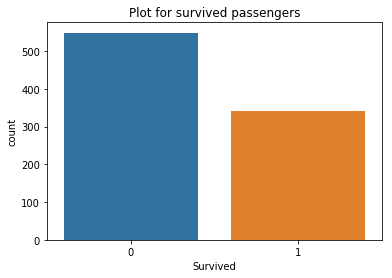

In [6]:
sns.countplot(x='Survived', data=titanic_data)
plt.title('Plot for survived passengers')

Text(0.5, 1.0, 'Plot for sex among survived passengers')

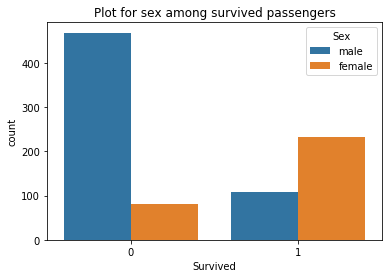

In [7]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Plot for sex among survived passengers')

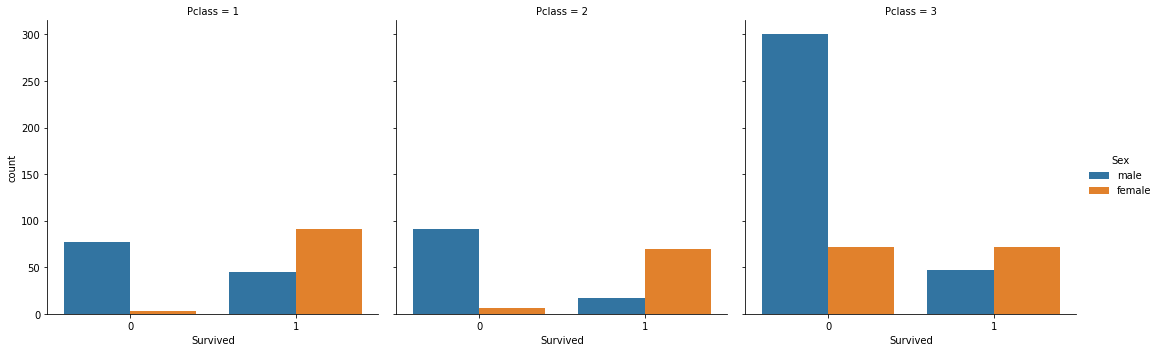

In [19]:
## Plot for passenger class among survived passengers against Sex
sns.catplot(x='Survived', hue='Sex', col='Pclass', data=titanic_data, kind='count', height=5, aspect=1)

Text(0.5, 1.0, 'Histogram of Age')

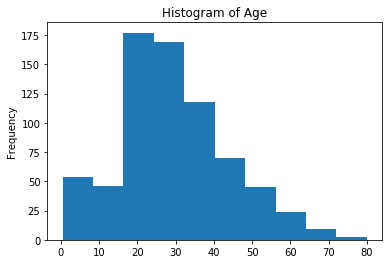

In [112]:
titanic_data['Age'].plot.hist()
plt.title('Histogram of Age')
#plt.savefig('hist_age')

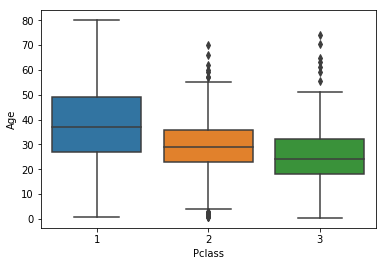

In [113]:
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

## This implies that 1st and 2 class have much older people travelled than 3rd class

Text(0.5, 1.0, 'Histogram of Fare')

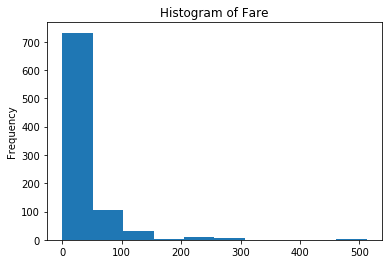

In [114]:
titanic_data['Fare'].plot.hist()
plt.title('Histogram of Fare')
#plt.savefig('hist_fare')

In [115]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Text(0.5, 1.0, 'Plot for Siblings')

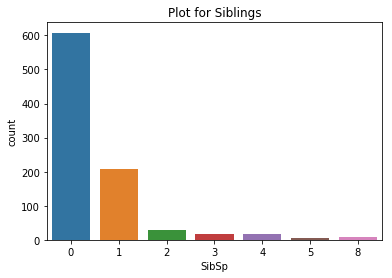

In [116]:
sns.countplot(x='SibSp', data=titanic_data)
plt.title('Plot for Siblings')

Text(0.5, 1.0, 'Plot for Parch')

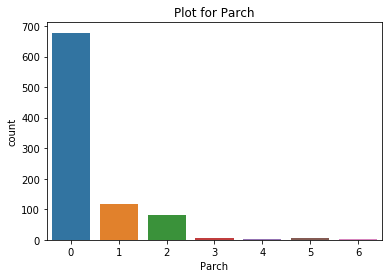

In [117]:
sns.countplot(x='Parch', data=titanic_data)
plt.title('Plot for Parch')

### Data Wrangling/Cleansing

In [118]:
titanic_data.isnull() ## This will give Boolean values against each row and column values
titanic_data.isnull().sum()  ## this will give sum of null alues against each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


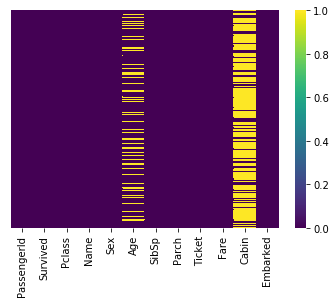

In [120]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap='viridis')

## This implied that cabin class has lot of NULL values, and also the coumn is of no use

In [121]:
titanic_data.drop('Cabin', axis=1, inplace=True)
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [20]:
## Now Age column has NaN values, so either we can dropna values or we can replace NaN values with Mode of the column

#titanic_data.dropna(inplace=True)
## Or we can do:
median=titanic_data['Age'].median()
print(median)

28.0


In [21]:
# replacing na values in college with No college 
titanic_data['Age'].fillna(median, inplace = True) 

In [22]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [126]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


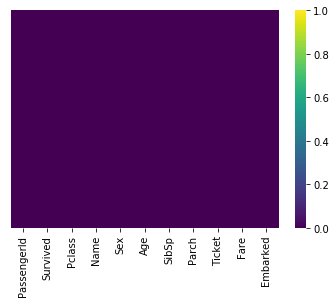

In [127]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap='viridis', cbar=True)

In [128]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [129]:
## Lets remove NaN values from Embarked column also

titanic_data['Embarked'].mode()

0    S
dtype: object

In [130]:
titanic_data['Embarked'].fillna('S', inplace = True) 

In [131]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [132]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Second Step of Data Wrangling is to remove string values and covert into catagorical variables

In [133]:
sex=pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head(10)

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [134]:
embark=pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark.head(10)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [135]:
pcls=pd.get_dummies(titanic_data['Pclass'], drop_first=True)
pcls.head(10)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
5,0,1
6,0,0
7,0,1
8,0,1
9,1,0


In [136]:
titanic_data=pd.concat([titanic_data,sex,embark,pcls],axis=1)
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,1,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0,1,0


In [137]:
titanic_data.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [138]:
titanic_data.head(10)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
5,0,28.0,0,0,8.4583,1,1,0,0,1
6,0,54.0,0,0,51.8625,1,0,1,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,1
9,1,14.0,1,0,30.0708,0,0,0,1,0


In [139]:
print(titanic_data.shape)

(891, 10)


## Training Data and Prediction

In [140]:
X=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [142]:
logmodel=LogisticRegression()

In [143]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
prediction=logmodel.predict(X_test)

### Classification Report

In [145]:
from sklearn.metrics import classification_report

In [146]:
classification_report(y_test,prediction)

'             precision    recall  f1-score   support\n\n          0       0.77      0.88      0.82       153\n          1       0.80      0.65      0.72       115\n\navg / total       0.78      0.78      0.78       268\n'

### Confusion Matrix

In [147]:
from sklearn.metrics import confusion_matrix

In [148]:
confusion_matrix(y_test,prediction)

array([[134,  19],
       [ 40,  75]], dtype=int64)

In [149]:
from sklearn.metrics import accuracy_score

In [150]:
accuracy_score(y_test,prediction)*100

77.98507462686567

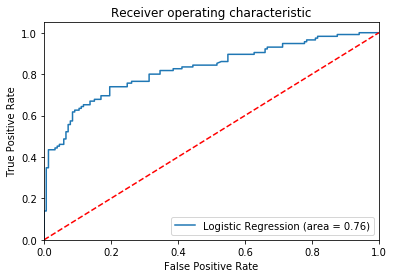

In [152]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()